In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importing the 20 news groups data

In [6]:
#categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
#categories = None
twenty_train = fetch_20newsgroups(subset='train',shuffle=True,remove=(['headers','footers','quotes']))
twenty_test = fetch_20newsgroups(subset='test',shuffle=True,remove=(['headers','footers','quotes']))
print ("Train data target labels:",twenty_train.target)
print ("Test data target labels:",twenty_test.target)

Train data target labels: [7 4 4 ... 3 1 8]
Test data target labels: [ 7  5  0 ...  9  6 15]


In [7]:
print ("Train data target names:",twenty_train.target_names)
print ("Test data target names:",twenty_test.target_names)

Train data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Test data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [8]:
print ("Total train data:",len(twenty_train.data))
print ("Total test data:",len(twenty_test.data))

Total train data: 11314
Total test data: 7532


# Frequency of each category

In [9]:
twenty_train_targets, frequency_train = np.unique(twenty_train.target, return_counts=True)
print ("Train data target: ", twenty_train_targets)
print ("Train data target frequency: ", frequency_train)

twenty_test_targets, frequency_test = np.unique(twenty_test.target, return_counts=True)
print ("\nTrain data target: ", twenty_test_targets)
print ("Train data target frequency: ", frequency_test)

Train data target:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Train data target frequency:  [480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]

Train data target:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Train data target frequency:  [319 389 394 392 385 395 390 396 398 397 399 396 393 396 394 398 364 376
 310 251]


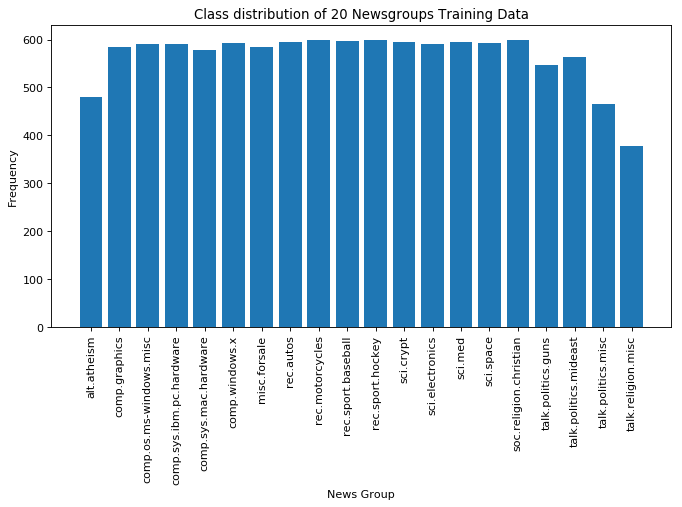

In [7]:
%matplotlib inline

twenty_train_targets = np.array(twenty_train.target_names)
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(twenty_train_targets,frequency_train)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

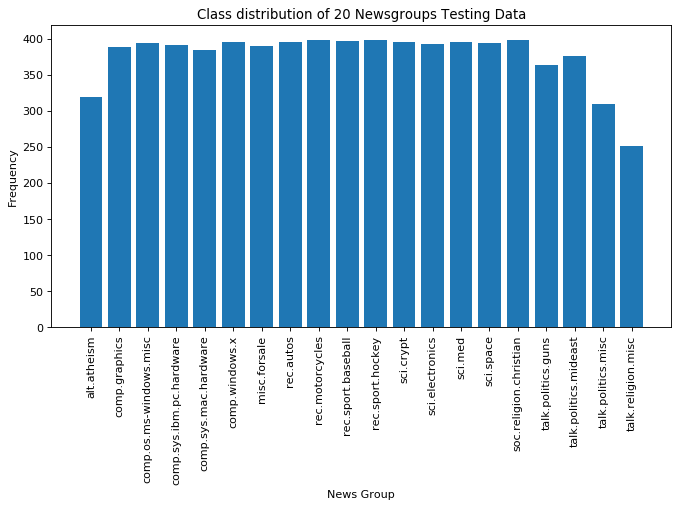

In [8]:
twenty_test_targets = np.array(twenty_test.target_names)
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(twenty_test_targets,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Testing Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

# Converting text data into Vectors

In [9]:
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(twenty_train.data)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(twenty_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print (X_train_tfidf.shape)
print (X_test_tfidf.shape)

(11314, 101322)
(7532, 101322)


In [10]:
xtrtf = X_train_tfidf
ytrtgt = twenty_train.target
xtetf = X_test_tfidf
ytetgt = twenty_test.target

# Classification models

## 1. Logistic Regression

In [11]:
clf = LogisticRegression()
log_clf = clf.fit(xtrtf,ytrtgt)
clf_train_score = log_clf.score(xtrtf,ytrtgt)
clf_test_score = log_clf.score(xtetf,ytetgt)
clf_pred = clf.predict(xtrtf)
clf_pred_prob = clf.predict_proba(xtrtf)
print ("Predicted class labels:", clf_pred);
print ("Predicted class labels probability:", clf_pred_prob);
print ("Prediction train score:", clf_train_score);
print ("Prediction test score:", clf_test_score);

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Predicted class labels: [ 7  4  4 ...,  3 14  8]
Predicted class labels probability: [[ 0.01061947  0.01508539  0.01566137 ...,  0.01458521  0.0096766
   0.0102314 ]
 [ 0.01541382  0.02665184  0.0276518  ...,  0.01785157  0.01828902
   0.02008558]
 [ 0.01384068  0.04717377  0.03924521 ...,  0.01229852  0.0202389
   0.01794239]
 ..., 
 [ 0.02316024  0.02296292  0.03082001 ...,  0.02565116  0.02348683
   0.02079842]
 [ 0.03649117  0.23734621  0.01928516 ...,  0.02687214  0.02623917
   0.0318353 ]
 [ 0.01906841  0.03709198  0.02860863 ...,  0.02667783  0.0328985
   0.01942264]]
Prediction train score: 0.911260385363
Prediction test score: 0.690387679235


## 2. Decision Tree

In [12]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrtf,ytrtgt)
clf_train_score = clf.score(xtrtf,ytrtgt)
clf_test_score = clf.score(xtetf,ytetgt)
print("Predicted train score: ",clf_train_score)
print ("Prediction test score:", clf_test_score)

#Limiting the depth (Pruning) to reduce overfitting
clfLimit = DecisionTreeClassifier(max_depth=85,random_state=0)
clfLimit.fit(xtrtf,ytrtgt)
clf_train_score = clfLimit.score(xtrtf,ytrtgt)
clf_test_score = clfLimit.score(xtetf,ytetgt)
print("Predicted train score with depth limit: ",clf_train_score)
print ("Prediction test score with depth limit:", clf_test_score)

Predicted train score:  0.973660951034
Prediction test score: 0.440520446097
Predicted train score with depth limit:  0.662100053032
Prediction test score with depth limit: 0.394184811471


## 3. Support Vector Machine

In [13]:
clf =  LinearSVC(random_state=0, tol=1e-5)
clf.fit(xtrtf,ytrtgt)

clf_pred = clf.predict(xtetf)
print ("Predicted class labels:", clf_pred)

clf_conf_pred = clf.decision_function(xtetf)
print ("Predicted confidence score:\n", clf_conf_pred)

clf_train_score = clf.score(xtrtf,ytrtgt)
print("Predicted train score: ",clf_train_score)

clf_test_score = clf.score(xtetf,ytetgt)
print ("Prediction test score:", clf_test_score)

Predicted class labels: [ 4  1  2 ...,  9 12  0]
Predicted confidence score:
 [[-0.823611   -0.77791624 -1.32010453 ..., -1.23670618 -1.39377149
  -1.60415716]
 [-1.09541874 -0.07836997 -1.39731498 ..., -1.16342077 -0.83268714
  -1.0466966 ]
 [-0.86579353 -0.80058137 -0.47082505 ..., -1.27887895 -0.6786406
  -0.65593369]
 ..., 
 [-0.80364396 -1.07902204 -0.95871651 ..., -1.15863402 -0.81684653
  -1.46888435]
 [-1.18136974 -1.22695733 -1.60051866 ..., -1.23768058 -1.25401131
  -1.07905991]
 [-0.5501819  -1.09969848 -1.22823312 ..., -1.34774275 -1.03039837
  -0.6350205 ]]
Predicted train score:  0.972070001768
Prediction test score: 0.69277748274


## 4. AdaBoost

In [14]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(xtrtf,ytrtgt)

clf_pred = clf.predict(xtetf)
print ("Predicted class labels:", clf_pred)

clf_pred_prob = clf.predict_proba(xtetf)
print ("Predicted class labels:", clf_pred_prob)

clf_train_score = clf.score(xtrtf,ytrtgt)
print("Predicted train score: ",clf_train_score)

clf_test_score = clf.score(xtetf,ytetgt)
print ("Prediction test score:", clf_test_score)

Predicted class labels: [ 9  1  9 ...,  9  6 15]
Predicted class labels: [[ 0.05004882  0.04999671  0.04994492 ...,  0.04997084  0.05013667
   0.04992124]
 [ 0.04252666  0.06071909  0.05871873 ...,  0.0424604   0.04260131
   0.04241825]
 [ 0.05004882  0.04999671  0.04994492 ...,  0.04997084  0.05013667
   0.04992124]
 ..., 
 [ 0.04021878  0.0542678   0.04709659 ...,  0.05514766  0.05424279
   0.05499858]
 [ 0.03863092  0.05404356  0.05200966 ...,  0.05249715  0.05420318
   0.05351837]
 [ 0.06354857  0.04533642  0.04528946 ...,  0.06299933  0.04546333
   0.06380101]]
Predicted train score:  0.491956867598
Prediction test score: 0.423791821561


## 5. Random Forest

In [15]:
clf = RandomForestClassifier(random_state=0)
clf.fit(xtrtf,ytrtgt)

#clf_decision_path = clf.decision_path(xtrtf)
#print("Decision path:\n",clf_decision_path)

clf_pred = clf.predict(xtetf)
print ("Predicted class labels:", clf_pred)

clf_pred_prob = clf.predict_proba(xtetf)
print ("Predicted class labels:", clf_pred_prob)

clf_train_score = clf.score(xtrtf,ytrtgt)
print("Predicted train score: ",clf_train_score)

clf_test_score = clf.score(xtetf,ytetgt)
print ("Prediction test score:", clf_test_score)

#Limiting the depth (Pruning) to reduce overfitting
clfLimit = RandomForestClassifier(max_depth=100,random_state=0)
clfLimit.fit(xtrtf,ytrtgt)
clf_train_score = clfLimit.score(xtrtf,ytrtgt)
clf_test_score = clfLimit.score(xtetf,ytetgt)
print("Predicted train score with depth limit: ",clf_train_score)
print ("Prediction test score with depth limit:", clf_test_score)

/usr/lib/python3/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicted class labels: [ 7  1 17 ...,  2  6 15]
Predicted class labels: [[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.2         0.1        ...,  0.          0.          0.        ]
 [ 0.01701882  0.0289581   0.14602817 ...,  0.32502543  0.01967576
   0.02396403]
 ..., 
 [ 0.1         0.          0.2        ...,  0.          0.          0.        ]
 [ 0.          0.1         0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.2         0.1         0.1       ]]
Predicted train score:  0.969595191798
Prediction test score: 0.503717472119


/usr/lib/python3/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicted train score with depth limit:  0.831359377762
Prediction test score with depth limit: 0.491104620287


# Validation

## 1. Building a pipeline

### 1.1 Logistic Regression

In [10]:
text_clf_lr = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(random_state=0))])
text_clf_lr = text_clf_lr.fit(twenty_train.data, twenty_train.target)

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### 1.2 Decision Tree

In [11]:
text_clf_dt = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', DecisionTreeClassifier(random_state=0))])
text_clf_dt = text_clf_dt.fit(twenty_train.data, twenty_train.target)

### 1.3 Support Vector Machine

In [12]:
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC(random_state=0, tol=1e-5))])
text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)

### 1.4 AdaBoost

In [13]:
text_clf_ab = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', AdaBoostClassifier(n_estimators=100, random_state=0))])
text_clf_ab = text_clf_ab.fit(twenty_train.data, twenty_train.target)

### 1.5 Random Forest

In [14]:
text_clf_rf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(max_depth=100,random_state=0))])
text_clf_rf = text_clf_rf.fit(twenty_train.data, twenty_train.target)

/usr/lib/python3/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 2. GridSearchCV

In [15]:
#record the classifier's best score and its best hyperparameter
best_scores = []
best_parameters = []

### 2.1 Logistic Regression

In [16]:
%%time

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__penalty': ('l1', 'l2')}
grid_search = GridSearchCV(text_clf_lr, parameters, cv=5,n_jobs=-1)
grid_search_lr = grid_search.fit(twenty_train.data, twenty_train.target)

best_scores.append(grid_search_lr.best_score_)
best_parameters.append(grid_search_lr.best_params_)

print('Best training score: ', grid_search_lr.best_score_)
print('Best parameters = ')
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search_lr.best_params_[param_name]))

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best training score:  0.7411171999292911
Best parameters = 
clf__penalty: 'l2'
tfidf__use_idf: True
vect__ngram_range: (1, 1)
CPU times: user 5.43 s, sys: 257 ms, total: 5.69 s
Wall time: 2min 46s


### 2.2 Decision Tree

In [17]:
%%time

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__criterion': ['gini', 'entropy'],
              'clf__splitter': ["best", "random"]}
grid_search = GridSearchCV(text_clf_dt, parameters, cv=5, n_jobs=-1)
grid_search_dt = grid_search.fit(twenty_train.data, twenty_train.target)

best_scores.append(grid_search_dt.best_score_)
best_parameters.append(grid_search_dt.best_params_)

print('Best training score: ', grid_search_dt.best_score_)
print('Best parameters = ')
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search_dt.best_params_[param_name]))

Best training score:  0.4882446526427435
Best parameters = 
clf__criterion: 'gini'
clf__splitter: 'random'
tfidf__use_idf: True
vect__ngram_range: (1, 2)
CPU times: user 1min 3s, sys: 346 ms, total: 1min 3s
Wall time: 12min 47s


### 2.3 Support Vector Machine

In [18]:
%%time
#C : Controls tradeoff detween smooth decision boundary and classfying training points correctly

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__C': [1, 10],
              'clf__loss': ('hinge', 'squared_hinge')}
grid_search = GridSearchCV(text_clf_svm, parameters, cv=5,n_jobs=-1)
grid_search_svm = grid_search.fit(twenty_train.data, twenty_train.target)

best_scores.append(grid_search_svm.best_score_)
best_parameters.append(grid_search_svm.best_params_)

print('Best training score: ', grid_search_svm.best_score_)
print('Best parameters = ')
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search_svm.best_params_[param_name]))

Best training score:  0.775057450945731
Best parameters = 
clf__C: 10
clf__loss: 'squared_hinge'
tfidf__use_idf: True
vect__ngram_range: (1, 2)
CPU times: user 30.6 s, sys: 420 ms, total: 31 s
Wall time: 8min 47s


### 2.4 AdaBoost

In [19]:
%%time
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__n_estimators': [50, 100, 150],
              'clf__learning_rate': (0.5,1, 2)}
grid_search = GridSearchCV(text_clf_ab, parameters, cv=5,n_jobs=-1)
grid_search_ab = grid_search.fit(twenty_train.data, twenty_train.target)

best_scores.append(grid_search_ab.best_score_)
best_parameters.append(grid_search_ab.best_params_)

print('Best training score: ', grid_search_ab.best_score_)
print('Best parameters = ')
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search_ab.best_params_[param_name]))

/usr/lib/python3/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best training score:  0.4796712038182782
Best parameters = 
clf__learning_rate: 0.5
clf__n_estimators: 150
tfidf__use_idf: False
vect__ngram_range: (1, 2)
CPU times: user 54.1 s, sys: 465 ms, total: 54.6 s
Wall time: 12min 35s


### 2.5 Random Forest

In [20]:
%%time
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__criterion': ['gini', 'entropy'],
              'clf__n_estimators': [100, 150,200],
              'clf__max_depth': [2,3,4,5]}
grid_search = GridSearchCV(text_clf_rf, parameters, cv=5,n_jobs=-1)
grid_search_rf = grid_search.fit(twenty_train.data, twenty_train.target)

best_scores.append(grid_search_rf.best_score_)
best_parameters.append(grid_search_rf.best_params_)

print('Best training score: ', grid_search_rf.best_score_)
print('Best parameters = ')
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search_rf.best_params_[param_name]))

Best training score:  0.5465794590772495
Best parameters = 
clf__criterion: 'gini'
clf__max_depth: 5
clf__n_estimators: 200
tfidf__use_idf: True
vect__ngram_range: (1, 1)
CPU times: user 24.6 s, sys: 1.66 s, total: 26.3 s
Wall time: 9min 59s


## Classifiers Best score and Test accuracy Table

In [26]:
classifiers = ['Logistic Regression', 'Decision Tree', 'SVM', 'AdaBoost', 'Random Forest']
test_accuracy = []

test_accuracy.append(grid_search_lr.best_estimator_.score(twenty_test.data, twenty_test.target))
test_accuracy.append(grid_search_dt.best_estimator_.score(twenty_test.data, twenty_test.target))
test_accuracy.append(grid_search_svm.best_estimator_.score(twenty_test.data, twenty_test.target))
test_accuracy.append(grid_search_ab.best_estimator_.score(twenty_test.data, twenty_test.target))
test_accuracy.append(grid_search_rf.best_estimator_.score(twenty_test.data, twenty_test.target))

data_validation_table_df = pd.DataFrame({'classifier':classifiers, 'Best score':best_scores,'Test accuracy': test_accuracy})
data_validation_table_df

,classifier,Best score,Test accuracy
0,Logistic Regression,0.741117,0.690388
1,Decision Tree,0.488245,0.452469
2,SVM,0.775057,0.703797
3,AdaBoost,0.479671,0.449150
4,Random Forest,0.546579,0.516065


## Classifiers Best hyperparameters Table

In [37]:
clf_parameters = ['LR Penalty','Use idf', 'Vector diagram range', 'DT/RF Criterion', 'DT Splitter', 'SVM C', 'SVM Hinge', 
                 'AB Learning rate', 'AB/RF Estimators', 'RF Maximum depths']
best_parameters_df = pd.DataFrame(best_parameters)
classifiers_best_hyper_parameter = pd.DataFrame(best_parameters_df.values, columns=clf_parameters)
classifiers_best_hyper_parameter

,LR Penalty,Use idf,Vector diagram range,DT/RF Criterion,DT Splitter,SVM C,SVM Hinge,AB Learning rate,AB/RF Estimators,RF Maximum depths
0,l2,True,"(1, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,"(1, 2)",gini,random,NaN,NaN,NaN,NaN,NaN
2,NaN,True,"(1, 2)",NaN,NaN,10,squared_hinge,NaN,NaN,NaN
3,NaN,False,"(1, 2)",NaN,NaN,NaN,NaN,0.5,150,NaN
4,NaN,True,"(1, 1)",gini,NaN,NaN,NaN,NaN,200,5


# SVM Evaluation - Confusion Matrix

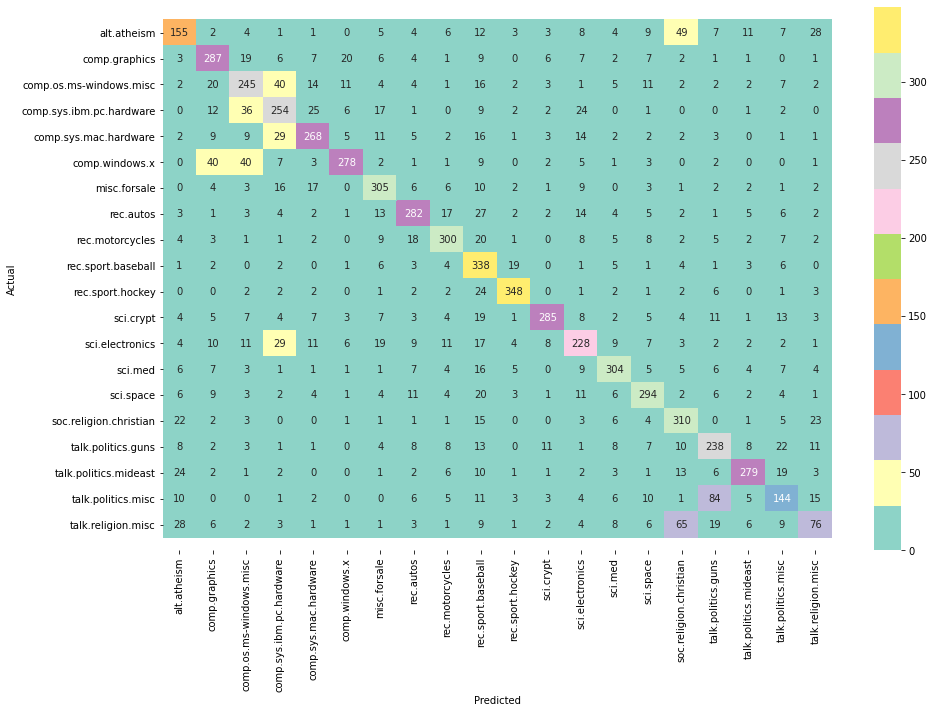

In [38]:
text_clf_svm.fit(twenty_train.data, twenty_train.target)
clf_prediction = text_clf_svm.predict(twenty_test.data)
conf_mat = confusion_matrix(twenty_test.target, clf_prediction)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap='Set3', fmt ='d', xticklabels=np.array(twenty_test.target_names), yticklabels=np.array(twenty_test.target_names))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylim(len(conf_mat)+0.5,-0.5)
plt.show()